In [1]:
# %matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
    exp = np.exp(x-x.max())
    return exp/exp.sum()

In [3]:
dimensions=[28*28, 10]
activation = [tanh, softmax]
distribution=[
    {'b':[0, 0]},
    {'b':[0, 0], 'w':[-math.sqrt(6/(dimensions[0]+ dimensions[1])), math.sqrt(6/(dimensions[0]+ dimensions[1]))]}
]

In [4]:
def init_parameters_b(layer):
    dist = distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0]) + dist[0]
def init_parameters_w(layer):
    dist = distribution[layer]['w']
    return np.random.rand(dimensions[layer-1], dimensions[layer])*(dist[1]-dist[0]) + dist[0]
def init_parameters():
    parameter = []
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='b':
                layer_parameter['b']=init_parameters_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_parameters_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [5]:
parameters = init_parameters()

In [6]:
def predict(img, parameters):
    l0_in = img+parameters[0]['b']
    l0_out = activation[0](l0_in)
    l1_in = np.dot(l0_out, parameters[1]['w']) + parameters[1]['b']
    l1_out = activation[1](l1_in)
    return l1_out

In [7]:
predict(np.random.rand(784), parameters).argmax()

5

In [8]:
mnist_x_train = np.load('mnist_x_train.npy')
tmp_y = np.load('mnist_y_train.npy')
mnist_x_test = np.load('mnist_x_test.npy')
mnist_y_test = np.load('mnist_y_test.npy')
m1, m2, m3 = mnist_x_train.shape
tmp = mnist_x_train.reshape(-1, m2*m3)
mnist_x_test = mnist_x_test.reshape(-1, m2*m3)

train_num = 50000
valid_num = 10000
test_num = 10000

mnist_x_train = tmp[:train_num]
mnist_x_valid = tmp[train_num:]
mnist_y_train = tmp_y[:train_num]
mnist_y_valid = tmp_y[train_num:]

In [9]:
print(mnist_x_train.shape)
print(mnist_x_valid.shape)
print(mnist_x_test.shape)
print(mnist_y_train.shape)
print(mnist_y_valid.shape)
print(mnist_y_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


In [10]:
def show_train(index):
    plt.imshow(mnist_x_train[index].reshape(28, 28), cmap='gray')
    print(f'label: {mnist_y_train[index]}')
def show_valid(index):
    plt.imshow(mnist_x_valid[index].reshape(28, 28), cmap='gray')
    print(f'label: {mnist_y_valid[index]}')
def show_test(index):
    plt.imshow(mnist_x_test[index].reshape(28, 28), cmap='gray')
    print(f'label: {mnist_y_test[index]}')

label: 0


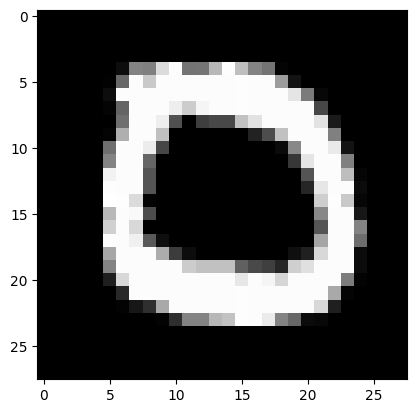

In [11]:
show_train(np.random.randint(train_num-1))

label: 0


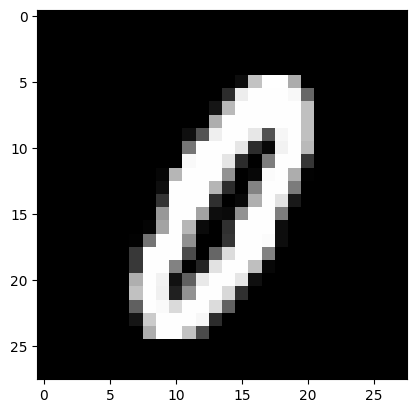

In [12]:
show_valid(np.random.randint(valid_num-1))

label: 3


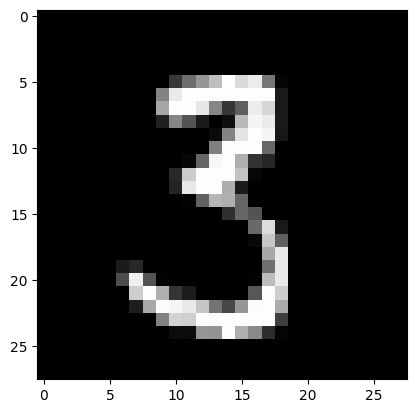

In [55]:
show_test(np.random.randint(test_num-1))

In [14]:
print(mnist_x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
mnist_x_train = np.divide(mnist_x_train, 255)
mnist_x_valid = np.divide(mnist_x_valid, 255)
mnist_x_test = np.divide(mnist_x_test, 255)

In [16]:
print(mnist_x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
def d_softmax(data):
    sm = softmax(data)
    sm_vec = sm.reshape(-1, 1)
    return np.diag(sm)-sm_vec@sm_vec.T

In [18]:
def d_tanh(data):
    th = 1-tanh(data)**2
    return np.diag(th)

In [19]:
differential = {softmax: d_softmax, tanh: d_tanh}

In [20]:
# 用来验证 softmax和tanh函数的导数求解是否正确
h = 0.0001
func = softmax
input_len = 4

test_input = np.random.rand(input_len)
true_derivation = differential[func](test_input)
esti_derivation = np.zeros((input_len, input_len))
for i in range(input_len):
    for j in range(input_len):
        value1 = func(test_input)[i]
        new_input = test_input.copy()
        new_input[j] += h
        value2 = func(new_input)[i]
        esti_derivation[i][j] = (value2 - value1)/h
print(esti_derivation-true_derivation)

[[ 4.26605521e-06 -1.76724289e-06 -1.72702920e-06 -1.74718399e-06]
 [-1.20684755e-06  4.79899249e-06 -1.16880048e-06 -1.18244069e-06]
 [-1.89071327e-06 -1.87374408e-06  4.02748403e-06 -1.85247636e-06]
 [-1.16849383e-06 -1.15800635e-06 -1.13165573e-06  4.78209965e-06]]


In [21]:
onehot = np.identity(dimensions[-1])

In [22]:
def sqr_loss(img, label, parameters):
    y_pred = predict(img, parameters)
    y = onehot[label]
    diff = y - y_pred
    return np.dot(diff, diff)

In [23]:
sqr_loss(mnist_x_train[0], mnist_y_train[0], parameters)

0.9056226396096255

In [24]:
def grad_parameters(img, label, parameters):
    l0_in = img+parameters[0]['b']
    l0_out = activation[0](l0_in)
    l1_in = np.dot(l0_out, parameters[1]['w']) + parameters[1]['b']
    l1_out = activation[1](l1_in)
    
    diff = l1_out - onehot[label]
    
    grad_b1 = 2*( diff @ differential[activation[1]](l1_in) )
    tmp = grad_b1.reshape(1, -1)
    y0 = l0_out.reshape(-1, 1)
    grad_w1 = y0 @ tmp
    grad_b0 = tmp @ parameters[1]['w'].T @ differential[activation[0]](l0_in)
    grad_b0 = grad_b0.reshape(-1)
    
    return {'w1':grad_w1, 'b1':grad_b1, 'b0':grad_b0}

In [25]:
# 用来验证对 b1 的导数求解是否正确
h = 0.0001

img_i = np.random.randint(train_num)
test_parameters = init_parameters()
true_derivative = grad_parameters(mnist_x_train[img_i], mnist_y_train[img_i], test_parameters)['b1']
esti_derivative = np.zeros(10)
for i in range(10):
    value1 = sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], test_parameters)
    tmp = test_parameters.copy()
    tmp[1]['b'][i] += h
    value2 = sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], tmp)
    esti_derivative[i] = (value2 - value1)/h
print(abs(esti_derivative - true_derivative).max())

3.717436131513152e-06


In [26]:
# 用来验证对 b0 的导数求解是否正确
h = 0.0001

img_i = np.random.randint(train_num)
test_parameters = init_parameters()
true_derivative = grad_parameters(mnist_x_train[img_i], mnist_y_train[img_i], test_parameters)['b0']
esti_derivative = np.zeros(784)
for i in range(784):
    value1 = sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], test_parameters)
    tmp = test_parameters.copy()
    tmp[0]['b'][i] += h
    value2 = sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], tmp)
    esti_derivative[i] = (value2 - value1)/h
print(abs(esti_derivative - true_derivative).max())

3.7954507678197857e-06


In [27]:
# 用来验证对 w1 的导数求解是否正确
h = 0.0001

img_i = np.random.randint(train_num)
test_parameters = init_parameters()
true_derivative = grad_parameters(mnist_x_train[img_i], mnist_y_train[img_i], test_parameters)['w1']
esti_derivative = np.zeros((784, 10))
for i in range(784):
    for j in range(10):
        value1 = sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], test_parameters)
        tmp = test_parameters.copy()
        tmp[1]['w'][i][j] += h
        value2 = sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], tmp)
        esti_derivative[i][j] = (value2 - value1)/h
print(abs(esti_derivative - true_derivative).max())

1.9139833583869947e-06


In [28]:
def valid_loss(parameters):
    loss_accu = 0
    for img_i in range(valid_num):
        loss_accu += sqr_loss(mnist_x_valid[img_i], mnist_y_valid[img_i], parameters)
    return loss_accu/(valid_num/1000)
def train_loss(parameters):
    loss_accu = 0
    for img_i in range(train_num):
        loss_accu += sqr_loss(mnist_x_train[img_i], mnist_y_train[img_i], parameters)
    return loss_accu/(train_num/1000)
def valid_accuracy(parameters):
    correct = []
    for img_i in range(valid_num):
        t = predict(mnist_x_valid[img_i], parameters).argmax() == mnist_y_valid[img_i]
        correct.append(t)
    return correct.count(True)/len(correct)
def train_accuracy(parameters):
    correct = []
    for img_i in range(train_num):
        t = predict(mnist_x_train[img_i], parameters).argmax() == mnist_y_train[img_i]
        correct.append(t)
    return correct.count(True)/len(correct)

In [43]:
batch_size=100

In [44]:
def batch_grad_avg(current_batch, parameters):
    grad_accu = grad_parameters(mnist_x_train[current_batch*batch_size+0], mnist_y_train[current_batch*batch_size+0], parameters)
    for img_i in range(1, batch_size):
        grad_tmp = grad_parameters(mnist_x_train[current_batch*batch_size+img_i], mnist_y_train[current_batch*batch_size+img_i], parameters)
        for key in grad_tmp.keys():
            grad_accu[key] += grad_tmp[key]
    for key in grad_accu.keys():
        grad_accu[key] /= batch_size
    return grad_accu

In [45]:
def step(parameters, grad, learning_rate):
    parameters_tmp = parameters.copy()
    parameters_tmp[0]['b'] -= learning_rate*grad['b0']
    parameters_tmp[1]['b'] -= learning_rate*grad['b1']
    parameters_tmp[1]['w'] -= learning_rate*grad['w1']
    return parameters_tmp

In [46]:
# 下面开始训练
parameters = init_parameters()
train_loss_array = []
train_loss_array.append(train_loss(parameters))
valid_loss_array = []
valid_loss_array.append(valid_loss(parameters))
train_accu = []
train_accu.append(train_accuracy(parameters))
valid_accu = []
valid_accu.append(valid_accuracy(parameters))

In [47]:
valid_accuracy(parameters)

0.1358

In [48]:
from tqdm.notebook import tqdm

In [49]:
batch_num = train_num // batch_size
learn_rate = 1
for epoch in tqdm(range(5)):
    print(f"epoch: {epoch}")
    for i in range(batch_num):
        grad_tmp = batch_grad_avg(i, parameters)
        parameters = step(parameters, grad_tmp, learn_rate)
    train_loss_array.append(train_loss(parameters))
    valid_loss_array.append(valid_loss(parameters))
    train_accu.append(train_accuracy(parameters))
    valid_accu.append(valid_accuracy(parameters))

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4


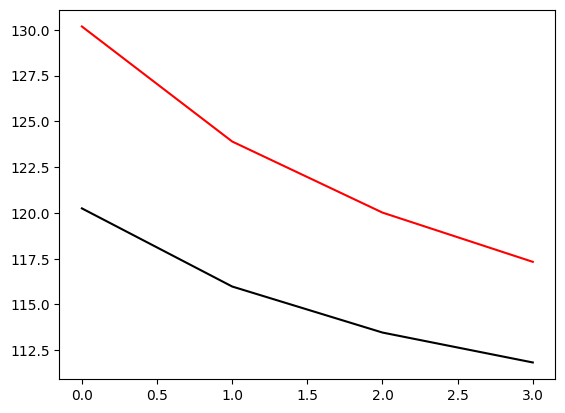

In [53]:
lower = 2
plt.plot(train_loss_array[lower:], color='red', label='train loss')
plt.plot(valid_loss_array[lower:], color='black', label='valid loss')
plt.show()

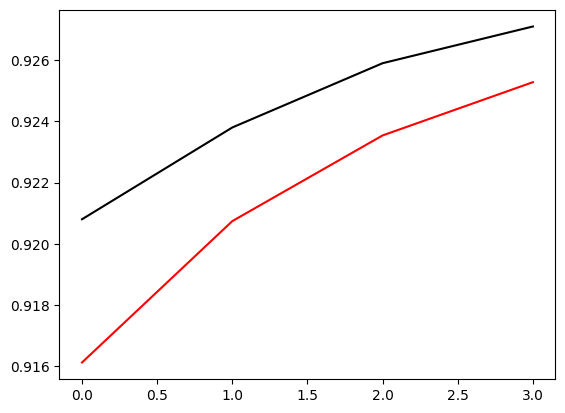

In [54]:
plt.plot(train_accu[lower:], color='red', label='train accuracy')
plt.plot(valid_accu[lower:], color='black', label='valid accuracy')
plt.show()

In [52]:
print(train_accuracy(parameters))
print(valid_accuracy(parameters))

0.92528
0.9271
